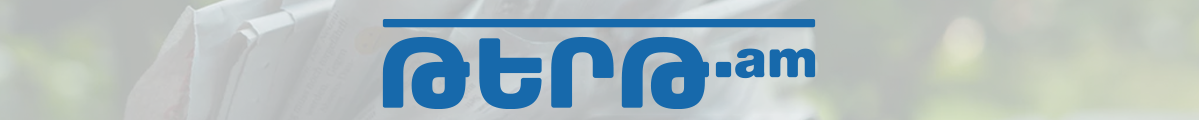

# **Text Classification**
## **Machine Learning 2021**
### **Final Project**
### **Artur Avagyan**

### **Import packages**

In [34]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
# sns.set_palette("rocket")
from datetime import datetime

import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
# sns.set_palette("Wistia")
import warnings
warnings.filterwarnings('ignore')

from IPython.display import HTML

### Connect google drive

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Function for scraping news articles from [Tert.am](https://www.tert.am)**

In [ ]:
def tert_am(number_of_articles):
  month_names=[' ',"January","February","March","April",
                "May","June","July","August",
                "September","October","November","December"]

  weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

  df_tert=pd.DataFrame(columns=['Website','Category','Year','Month',
                                'Weekday','Day','Hour','Title','Article'])
  count_article=0
  for i in range(1,4429):
    url='https://www.tert.am/am/news/{index}?from_date=01.01.2019&to_date=06.06.2021'.format(index=i)
    page = requests.get(url).text #use requests package for read web site
    soup = BeautifulSoup(page, "lxml")#use BeautifulSoup package for create HTML
    link_index=0
    for i in soup.find(class_="list list--max-height-none list--inline list--inline-pb show-link-visited").find_all(['a']):
      if link_index%3==0 and len(i['href'])>10:
        link_index+=1
        link_tert='https://www.tert.am'+i['href']
        try:
          page = requests.get(link_tert).text #use requests package for read web site
          soup = BeautifulSoup(page, "lxml")#use BeautifulSoup package for create HTML
          article=''
          for a in soup.find(class_="static-content clear-fix show-link-visited").find_all('p'):
            article=article+a.text+' '
          if len(article)>0:
            date_article=soup.find(class_="inner-content__article-date fb fs12").text
            date_article_hour=int(date_article[:2])
            date_article_day=int(date_article[8:10])
            date_article_month=int(date_article[11:13])
            date_article_year=int('20'+date_article[14:])
            date_article_weekday=weekdays[datetime(date_article_year, date_article_month, date_article_day,date_article_hour).weekday()]
            article_title=soup.find(class_="inner-content__article-title fb fs20").text
            category_article=soup.find(class_="list__category list__category--big fb fs15 ver-top-box tu").text[1:-1]
            if (len(category_article)==0) or (category_article==' '):
              category_article='Այլ'

            df_tert =df_tert.append({'Website':'tert.am','Category':category_article,
                                                    'Year': date_article_year,'Month':month_names[date_article_month],
                                                    'Weekday':date_article_weekday,'Day':date_article_day,
                                                    'Hour':date_article_hour,'Title':article_title,'Article':article},
                                                    ignore_index=True) #append row for every car
            count_article+=1
            print(count_article)
            if count_article==number_of_articles:
              return df_tert
        except:
          continue
      else:
        link_index+=1
        continue
  return df_tert

### **Scrap 15000 article from tert.am**

In [ ]:
%time tert_data=tert_am(15000)

### **Save data to csv file**

In [ ]:
tert_data.to_csv('Tert_am_data.csv',index=False)

### **Read csv file from Google Drive**

In [35]:
tert_data=pd.read_csv('Tert_data.csv')
tert_data

Website          Category  Year    Month    Weekday  Day  Hour  \
0      tert.am  Քաղաքականություն  2021     June     Sunday    6    23   
1      tert.am       Իրադարձային  2021     June     Sunday    6    23   
2      tert.am  Քաղաքականություն  2021     June     Sunday    6    23   
3      tert.am  Քաղաքականություն  2021     June     Sunday    6    22   
4      tert.am  Քաղաքականություն  2021     June     Sunday    6    22   
...        ...               ...   ...      ...        ...  ...   ...   
14995  tert.am  Քաղաքականություն  2021  Febuary  Wednesday   24    15   
14996  tert.am       Իրադարձային  2021  Febuary  Wednesday   24    14   
14997  tert.am       Իրադարձային  2021  Febuary  Wednesday   24    14   
14998  tert.am            Ժամանց  2021  Febuary  Wednesday   24    14   
14999  tert.am          Մշակույթ  2021  Febuary  Wednesday   24    14   

                                                   Title  \
0      Հիմա ադրբեջանցիները Ջերմուկից 10 կմ են հեռու, ...   
1      Էջմիածինում «Renault»-ի վարորդը վրաերթի է ենթա...   
2      Ադրբեջանը քաղաքական աճուրդի է հանել մեր ռազմագ...   
3      Ես երդվում եմ՝ եթե լինեի Գերագույն գլխավոր հրա...   
4      Պառակտված ժողովուրդը չի կարող սատար կանգնել իր...   
...                                                  ...   
14995  «Պուտինի օրակարգում ԱՄՆ ղեկավարության հետ շփու...   
14996  «Փորձում է բանակի պատրաստվածությունը չապահովել...   
14997  ՌԴ-ում ծորակի ջրից թունավորվել է ավելի քան 20 ...   
14998  Պեսկովը բացատրել է՝ ինչու է Պուտինն առանց գլխա...   
14999  «Շատ էի լարվում նրա հետ աշխատելիս. նա իր գործի...   

                                                 Article  
0      Այո, այս ստահակները տարիներ ի վեր խոսում էին ա...  
1      Երեկ՝ հունիսի 5-ին, վրաերթ է տեղի ունեցել Արմա...  
2      Ադրբեջանը շարունակում է քաղաքական պատանդի կարգ...  
3      Ես երդվում եմ՝ եթե լինեի Գերագույն գլխավոր հրա...  
4      Մենք, երևի թե, մեր իշխանության ժամանակ ունեցել...  
...                                                  ...  
14995  Ռուսաստանի Դաշնության նախագահ Վլադիմիր Պուտինի...  
14996  Նիկոլ Փաշինյանը քննադատում է ռուսական զենքը, ո...  
14997  Ռուսաստանի հարավում գտնվող Կասպիյսկ քաղաքում ա...  
14998  ՌԴ-ի նախագահ Վլադիմիր Պուտինը գերադասում է նշա...  
14999  Համաշխարհային ճանաչում ունեցող իտալացի դերասան...  

[15000 rows x 9 columns]

### **Unique Categories**

In [36]:
tert_data.Category.unique()

array(['Քաղաքականություն', 'Իրադարձային', 'Ժամանց', 'Իրավունք', 'Սպորտ',
       'Սպորտ ', 'Տնտեսություն', 'Գիտություն/տեխնիկա',
       'Մամուլի տեսություն', 'Մշակույթ', ' Իրադարձային', 'Իրադարձային ',
       'Կորոնավիրուս', ' Սպորտ', ' Քաղաքականություն', 'Քաղաքականություն '],
      dtype=object)

### **Change some wrong names**

In [37]:
tert_data.Month = np.where(tert_data.Month=='Febuary', 'February', tert_data.Month)
tert_data.Category = np.where((tert_data.Category==' Քաղաքականություն') | (tert_data.Category=='Քաղաքականություն '), 'Քաղաքականություն', tert_data.Category)
tert_data.Category = np.where((tert_data.Category==' Իրադարձային') | (tert_data.Category=='Իրադարձային '), 'Իրադարձային', tert_data.Category)
tert_data.Category = np.where((tert_data.Category==' Սպորտ') | (tert_data.Category=='Սպորտ '), 'Սպորտ', tert_data.Category)

### **Visualization some data columns**

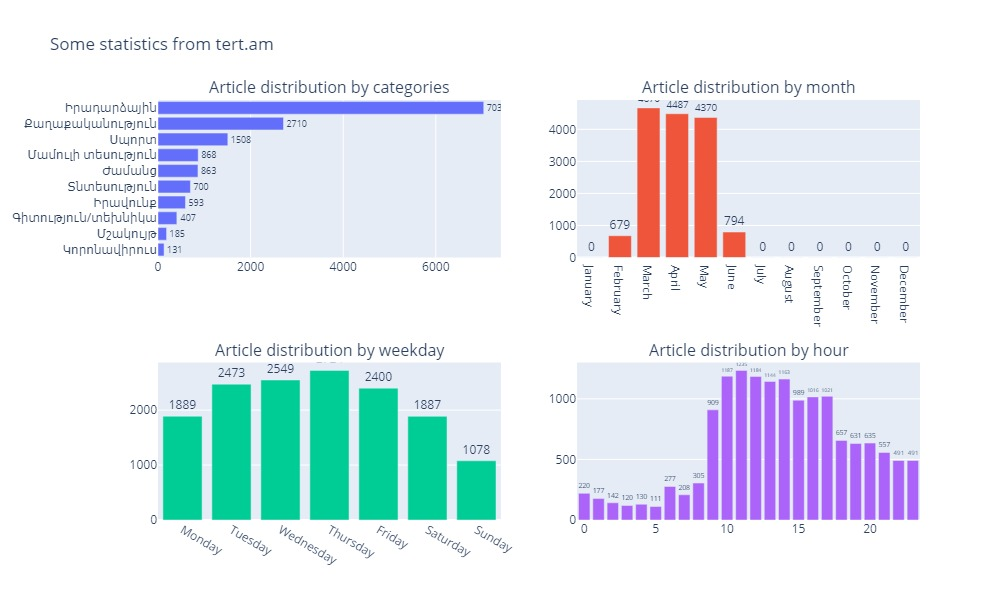

In [38]:
fig=make_subplots(rows=2,cols=2,
                subplot_titles=("Article distribution by categories",
                                "Article distribution by month",
                                "Article distribution by weekday",
                                "Article distribution by hour"))
fig.add_trace(go.Bar(y=tert_data.Category.value_counts().sort_values(ascending=True).index,
                    x=tert_data.Category.value_counts().sort_values(ascending=True),
                    name='',
                    orientation='h',
                    showlegend=False,
                    text=tert_data.Category.value_counts().sort_values(ascending=True),
                    textposition='outside'),row=1,col=1)

tert_data['Month'] = pd.Categorical(tert_data['Month'],
                            categories=['January','February','March','April','May','June',
                                        'July','August','September','October','November','December'],ordered=True)
fig.add_trace(go.Bar(x=tert_data.Month.value_counts().sort_index(ascending=True).index,
                    y=tert_data.Month.value_counts().sort_index(ascending=True),
                    name='',
                    orientation='v',
                    showlegend=False,
                    text=tert_data.Month.value_counts().sort_index(ascending=True),
                    textposition='outside'),row=1,col=2)

tert_data['Weekday'] = pd.Categorical(tert_data['Weekday'],
                            categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],ordered=True)
fig.add_trace(go.Bar(x=tert_data.Weekday.value_counts().sort_index(ascending=True).index,
                    y=tert_data.Weekday.value_counts().sort_index(ascending=True),
                    name='',
                    orientation='v',
                    showlegend=False,
                    text=tert_data.Weekday.value_counts().sort_index(ascending=True),
                    textposition='outside'),row=2,col=1)

tert_data['Hour'] = pd.Categorical(tert_data['Hour'],
                            categories=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23],ordered=True)
fig.add_trace(go.Bar(x=tert_data.Hour.value_counts().sort_index(ascending=True).index,
                    y=tert_data.Hour.value_counts().sort_index(ascending=True),
                    name='',
                    orientation='v',
                    showlegend=False,
                    text=tert_data.Hour.value_counts().sort_index(ascending=True),
                    textposition='outside'),row=2,col=2)


fig.update_layout(title="Some statistics from tert.am",
                  width=1650, height=950,
                  # paper_bgcolor="LightSteelBlue"
                  )
# fig.show()
fig.show(renderer="jpg", width=1000, height=600)
# HTML(fig.to_html())

### **Import packeges for text preprocessing**

In [10]:
import re
import nltk
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.tokenize import regexp_tokenize
from nltk.tokenize import TweetTokenizer
nltk.download('punkt')
from collections import Counter
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### **Function for text cleaning**

In [11]:
def text_cleaner(text_article):
  text = text_article.lower()
  text=' '.join(word_tokenize(text))
  text = re.sub('[\[.*?\]՝;՛։՞><-]', '', text)
  text = re.sub('[‘’“”…«»՝,․/;՛]', '', text)
  text = re.sub('A-Za-z', '', text)
  text = re.sub('\n', '', text)
  # text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
  text = re.sub('\w*\d\w*', '', text)
  text = word_tokenize(text)
  alpha_only = [t for t in text if t.isalpha()]
  arm_stop_words=["այդ","այլ","այն","այս","դու","դուք","եմ","չեմ","երևի",
            "են","ենք","ես","եք","է","էի","էին","էինք","եթե","դա",
            "չեն","չենք","չես","չեք","չի","չէի","չէին","չէինք",
            "էիր","էիք","էր","ըստ","թ.","թե","ի","ին","իսկ","ինչ","դրա",
            "իր","կամ","համար","հետ","հետո","մենք","մեջ","մասին","մեր",
            "մի","նա","նաև","նրա","նրանք","որ","որը","չի","դեպքում","ու",
            "որոնք","որպես","ում","պիտի","վրա","և","եւ","կարող","սակայն",
            "ահա", "անգամ", "գեթ", "գոնե", "իբր", "թող", "լոկ","որովհետև",
            "խո", "խոմ", "հենց", "հո", "մանավանդ","իրոք որ", "թերևս", "թեկուզ",
            "կարծես", "միգուցե", "միթե", "մինչև","անգամ", "նույնիսկ",
            "անկասկած", "անպատճառ", "անտարակույս", "բարեբախտաբար", 
            "դժբախտաբար", "տարաբախտաբար", "իսկապես", "միայն"]
  no_stops = [t for t in alpha_only if t not in arm_stop_words]
  text=' '.join(no_stops)
  return text

### **For example**

In [12]:
text_cleaner('Հայաստանը զբաղեցնում է 29 743 կմ2 տարածք (138-րդն աշխարհում) և ունի ▼2 930 450 մարդ (2017)[9] բնակչություն (136-րդն աշխարհում)')

'հայաստանը զբաղեցնում տարածք աշխարհում ունի մարդ բնակչություն աշխարհում'

### **Clean all 15000 articles**

In [13]:
text_clean = lambda x: text_cleaner(x)
all_data_clean=tert_data
all_data_clean['Article'] = pd.DataFrame(all_data_clean['Article'].apply(text_clean))
all_data_clean

Website  ...                                            Article
0      tert.am  ...  այո ստահակները տարիներ վեր խոսում ղարաբաղը պետ...
1      tert.am  ...  երեկ հունիսի վրաերթ տեղի ունեցել արմավիրի մարզ...
2      tert.am  ...  ադրբեջանը շարունակում քաղաքական պատանդի կարգավ...
3      tert.am  ...  երդվում լինեի գերագույն գլխավոր հրամանատարը այ...
4      tert.am  ...  իշխանության ժամանակ ունեցել թերությունը համեմա...
...        ...  ...                                                ...
14995  tert.am  ...  ռուսաստանի դաշնության նախագահ վլադիմիր պուտինի...
14996  tert.am  ...  նիկոլ փաշինյանը քննադատում ռուսական զենքը որպե...
14997  tert.am  ...  ռուսաստանի հարավում գտնվող կասպիյսկ քաղաքում ա...
14998  tert.am  ...  ռդի նախագահ վլադիմիր պուտինը գերադասում նշանակ...
14999  tert.am  ...  համաշխարհային ճանաչում ունեցող իտալացի դերասան...

[15000 rows x 9 columns]

### **Wordcloud for all type of categoeries**

In [ ]:
from wordcloud import WordCloud, STOPWORDS

def arm_eng(text):
    '''
    Parameters:
        text -> text
    Returns:
        text -> converted text from armenian to english
    Example: arm_eng('\u00d4\u00b2\u00d5\u00a1\u00d6\u0080\u00d6\u0087') returns 'Barev'
    ''' 
    text=text.replace('Ու','U')
    text=text.replace('ու','u')
    text=text.replace('Ով','Ov')
    text=text.replace('ով','ov')
    text=text.replace('ո','o')
    text=text.replace('օ','o')
    text=text.replace('Եվ','Ev')
    text=text.replace('Ա','A')
    text=text.replace('ա','a')
    text=text.replace('Բ','B')
    text=text.replace('բ','b')
    text=text.replace('Գ','G')
    text=text.replace('գ','g')
    text=text.replace('Դ','D')
    text=text.replace('դ','d')
    text=text.replace('Ե','E')
    text=text.replace('ե','e')
    text=text.replace('Զ','Z')
    text=text.replace('զ','z')
    text=text.replace('Ե','E')
    text=text.replace('ե','e')
    text=text.replace('Ը','Y')
    text=text.replace('ը','y')
    text=text.replace('Թ','T')
    text=text.replace('թ','t')
    text=text.replace('Ժ','Zh')
    text=text.replace('ժ','zh')
    text=text.replace('Ի','I')
    text=text.replace('ի','i')
    text=text.replace('Լ','L')
    text=text.replace('լ','l')
    text=text.replace('Խ','X')
    text=text.replace('խ','x')
    text=text.replace('Ծ','C')
    text=text.replace('ծ','c')
    text=text.replace('Կ','K')
    text=text.replace('կ','k')
    text=text.replace('Հ','H')
    text=text.replace('հ','h')
    text=text.replace('Ձ','Dz')
    text=text.replace('ձ','dz')
    text=text.replace('Ղ','Gh')
    text=text.replace('ղ','gh')
    text=text.replace('Ճ','Ch')
    text=text.replace('ճ','ch')
    text=text.replace('Մ','M')
    text=text.replace('մ','m')
    text=text.replace('Յ','Y')
    text=text.replace('յ','y')
    text=text.replace('Ն','N')
    text=text.replace('ն','n')
    text=text.replace('Շ','Sh')
    text=text.replace('շ','sh')
    text=text.replace('Ո','Vo')
    text=text.replace('Չ','Ch')
    text=text.replace('չ','ch')
    text=text.replace('Պ','P')
    text=text.replace('պ','p')
    text=text.replace('Ջ','J')
    text=text.replace('ջ','j')
    text=text.replace('Ռ','R')
    text=text.replace('ռ','r')
    text=text.replace('Ս','S')
    text=text.replace('ս','s')
    text=text.replace('Վ','V')
    text=text.replace('վ','v')
    text=text.replace('Տ','T')
    text=text.replace('տ','t')
    text=text.replace('Ր','R')
    text=text.replace('ր','r')
    text=text.replace('Ց','C')
    text=text.replace('ց','c')
    text=text.replace('Ու','U')
    text=text.replace('ու','u')
    text=text.replace('Փ','P')
    text=text.replace('փ','p')
    text=text.replace('Ք','Q')
    text=text.replace('ք','q')
    text=text.replace('Եվ','Ev')
    text=text.replace('և','ev')
    text=text.replace('Օ','O')
    text=text.replace('օ','o')
    text=text.replace('Ֆ','F')
    text=text.replace('ֆ','f')
    return text

def clean_text_no_split(text):
  text = text.lower()
  arm_stop_words=["այդ","այլ","այն","այս","դու","դուք","եմ","չեմ","երևի",
            "են","ենք","ես","եք","է","էի","էին","էինք","եթե","դա",
            "չեն","չենք","չես","չեք","չի","չէի","չէին","չէինք",
            "էիր","էիք","էր","ըստ","թ.","թե","ի","ին","իսկ","ինչ","դրա",
            "իր","կամ","համար","հետ","հետո","մենք","մեջ","մասին","մեր",
            "մի","նա","նաև","նրա","նրանք","որ","որը","չի","դեպքում","ու",
            "որոնք","որպես","ում","պիտի","վրա","և","եւ","կարող","սակայն",
            "ահա", "անգամ", "գեթ", "գոնե", "իբր", "թող", "լոկ","որովհետև",
            "խո", "խոմ", "հենց", "հո", "մանավանդ","իրոք որ", "թերևս", "թեկուզ",
            "կարծես", "միգուցե", "միթե", "մինչև","անգամ", "նույնիսկ",
            "անկասկած", "անպատճառ", "անտարակույս", "բարեբախտաբար", 
            "դժբախտաբար", "տարաբախտաբար", "իսկապես", "միայն"]
  for sm in arm_stop_words:
    if sm in text.split():
      text=re.sub(sm, '', text)
  text = re.sub('\[.*?\]', '', text)
  text = re.sub('\w*\d\w*', '', text)
  text = re.sub('[‘’“”…]', '', text)
  text = re.sub('\n', '', text)
  return text

def create_word_cloud(df,member_name):
	k=df['Category'].unique()
	dt = {'name': [], 'write': []}
	data=pd.DataFrame.from_dict(dt)
	data['name']=k
	data['write']=str(data['write'])
	for i in range(len(data)):
	    dict_=' '
	    member_message=df[df['Category']==data['name'][i]]['Article']
	    for j in member_message:
	        if (clean_text_no_split(j)!=''):
	            dict_=clean_text_no_split(j)+dict_
	    data['write'][i]=dict_

	  
	comment_words = ' '
	stopwords = set(STOPWORDS) 
	
	for val in data[data['name']==member_name].write:
	    val = str(arm_eng(val))
	    tokens = val.split()
	    for i in range(len(tokens)): 
	        tokens[i] = tokens[i].lower() 
	          
	    for words in tokens:
	    	if len(words)>4:
	    		comment_words = comment_words + words + ' '
	  
	  
	wordcloud = WordCloud(width = 600, height = 400, 
	                    background_color ='white', 
	                    stopwords = stopwords, 
	                    min_font_size = 10).generate(str(comment_words)) 
	                      
	plt.figure(figsize = (15, 15), facecolor = None) 
	plt.title('Wordcloud of {anun}'.format(anun=member_name))
	plt.imshow(wordcloud) 
	plt.axis("off") 
	plt.tight_layout(pad = 0) 
	plt.savefig("wordcloud.png")

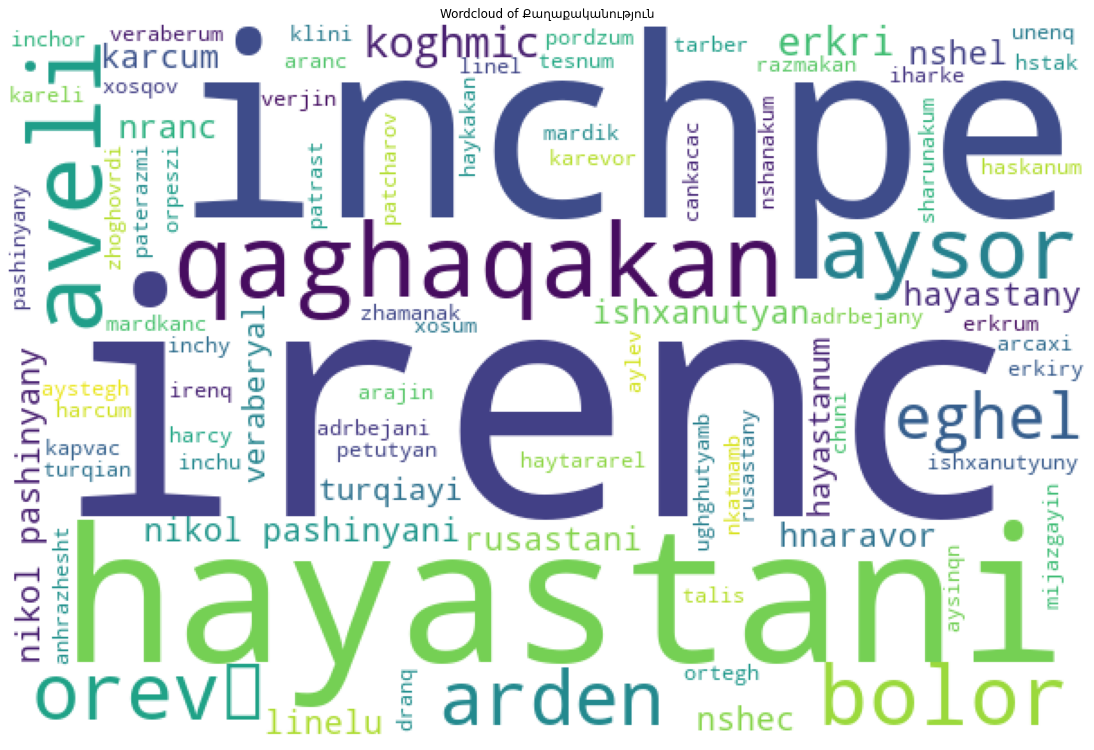

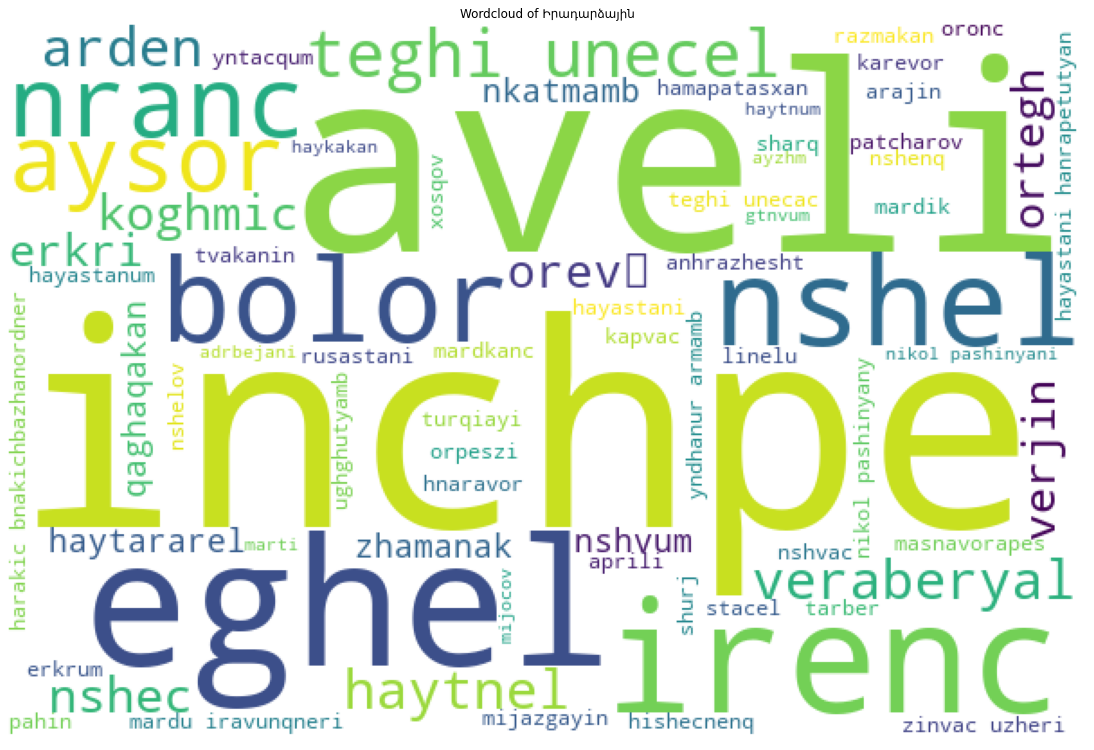

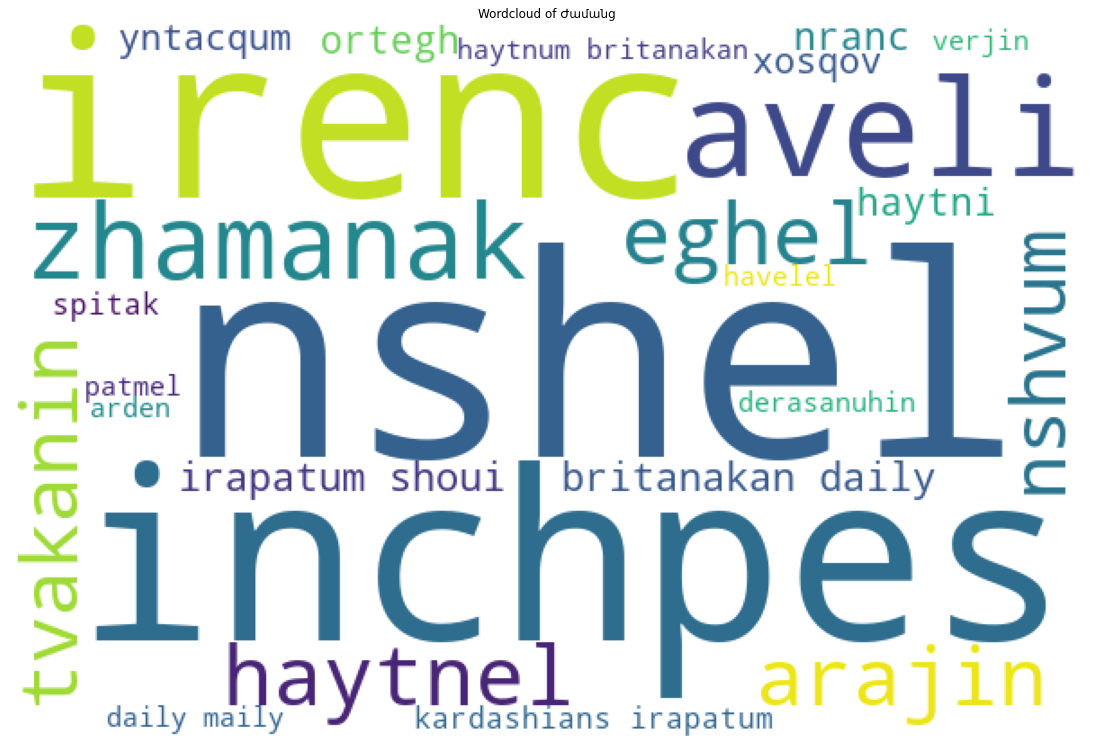

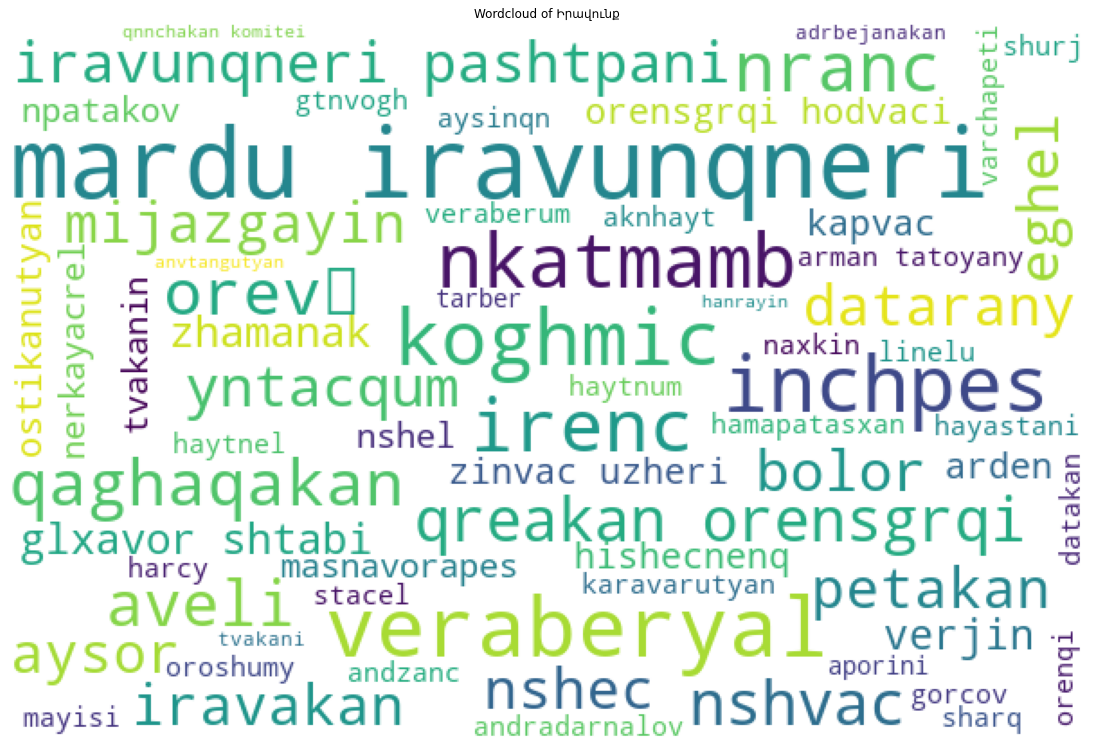

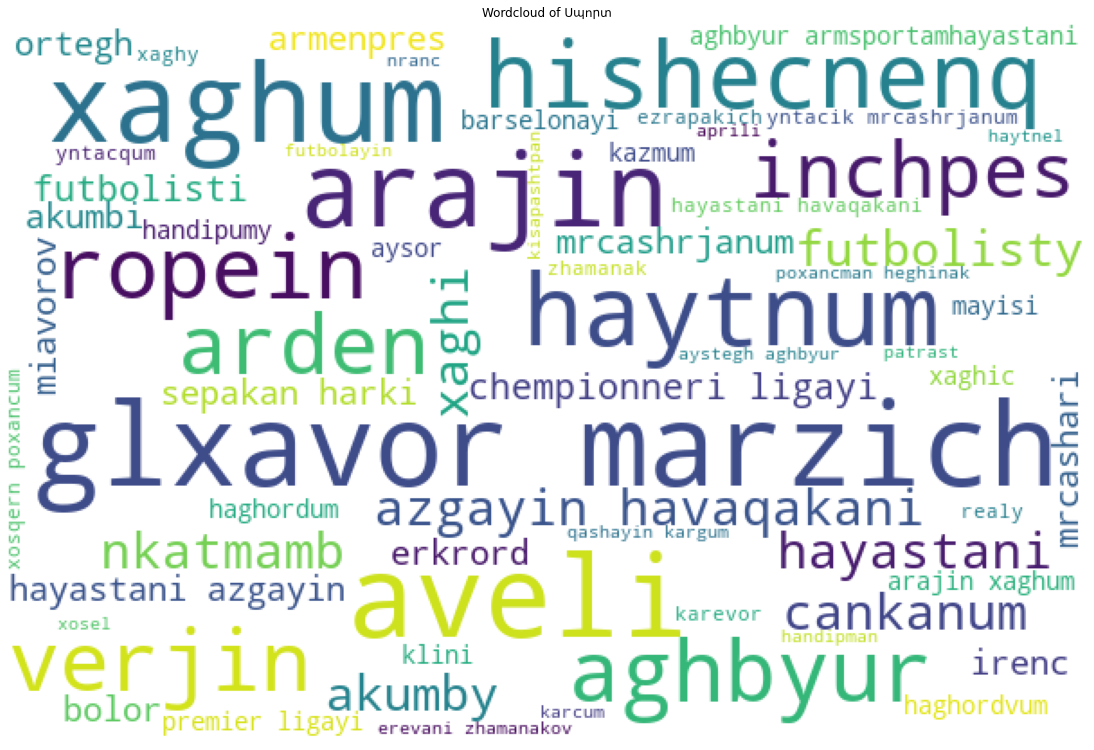

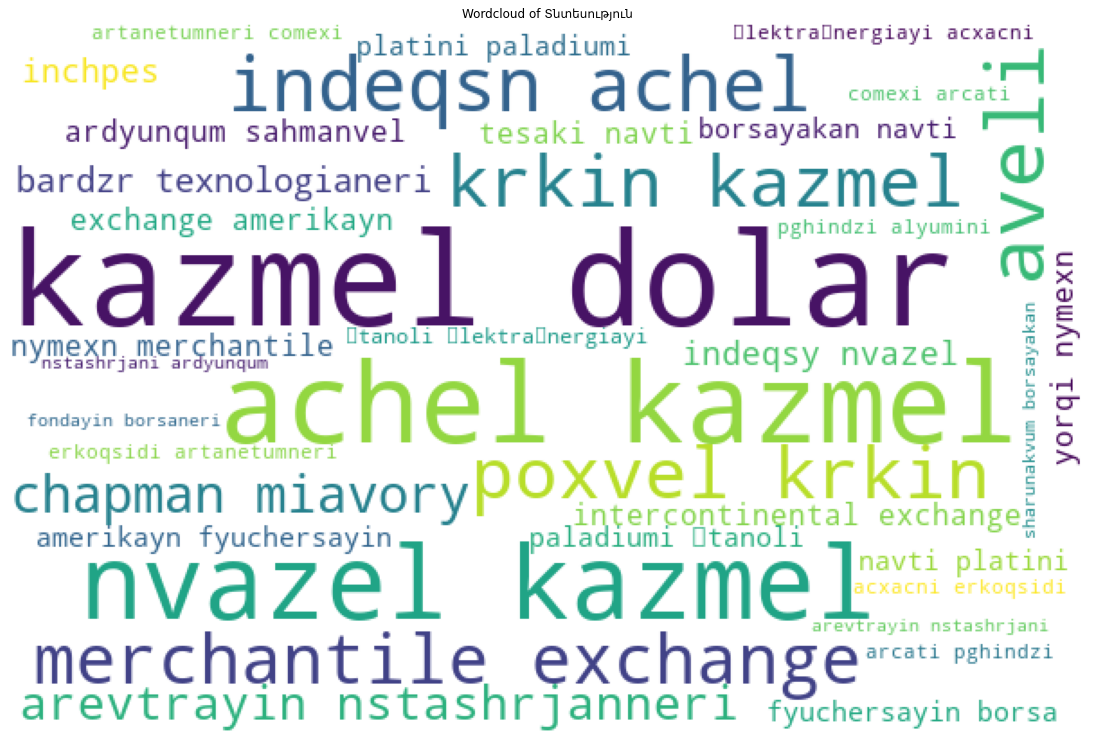

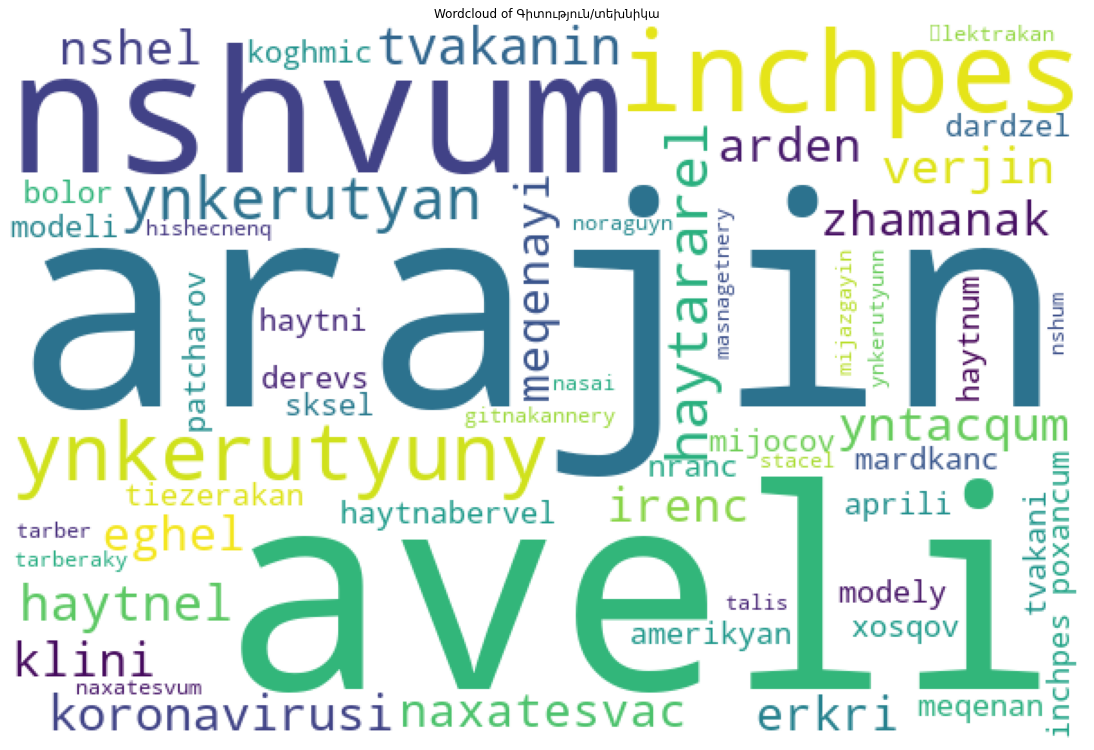

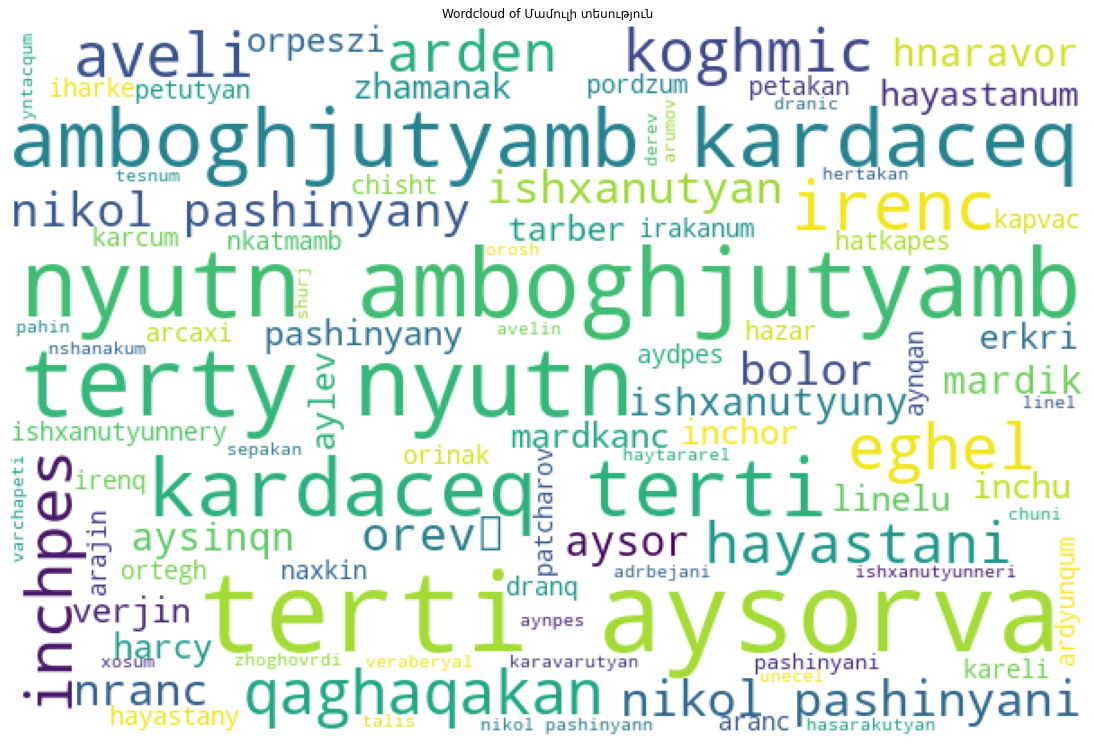

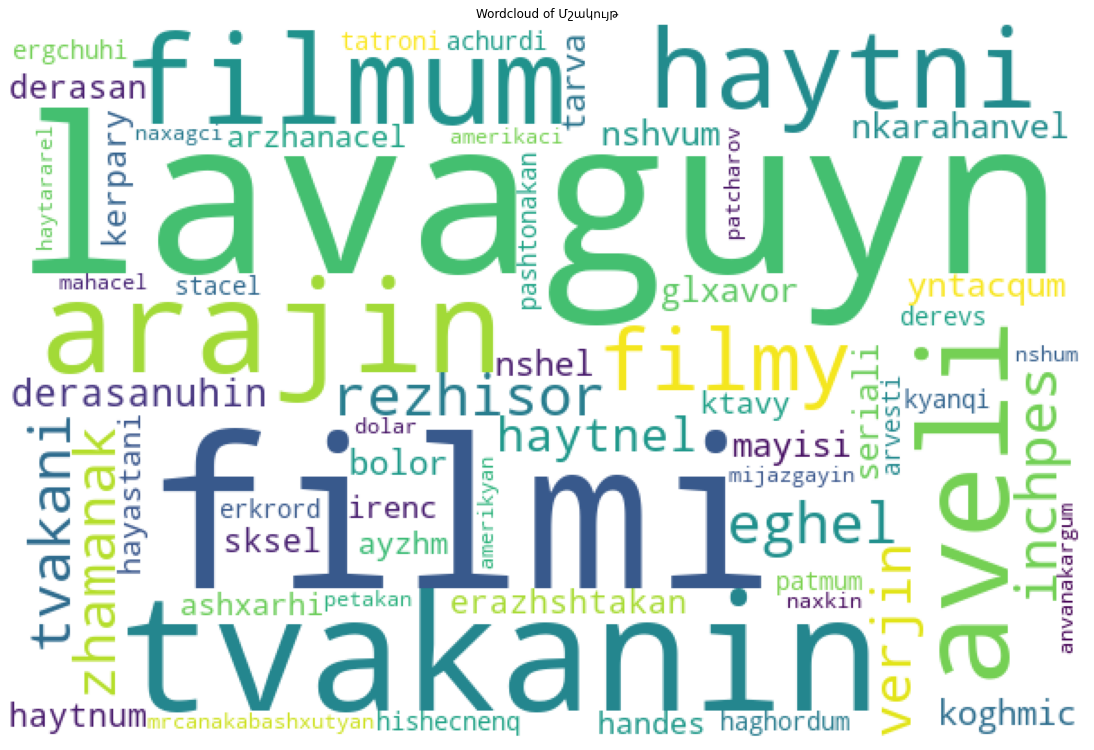

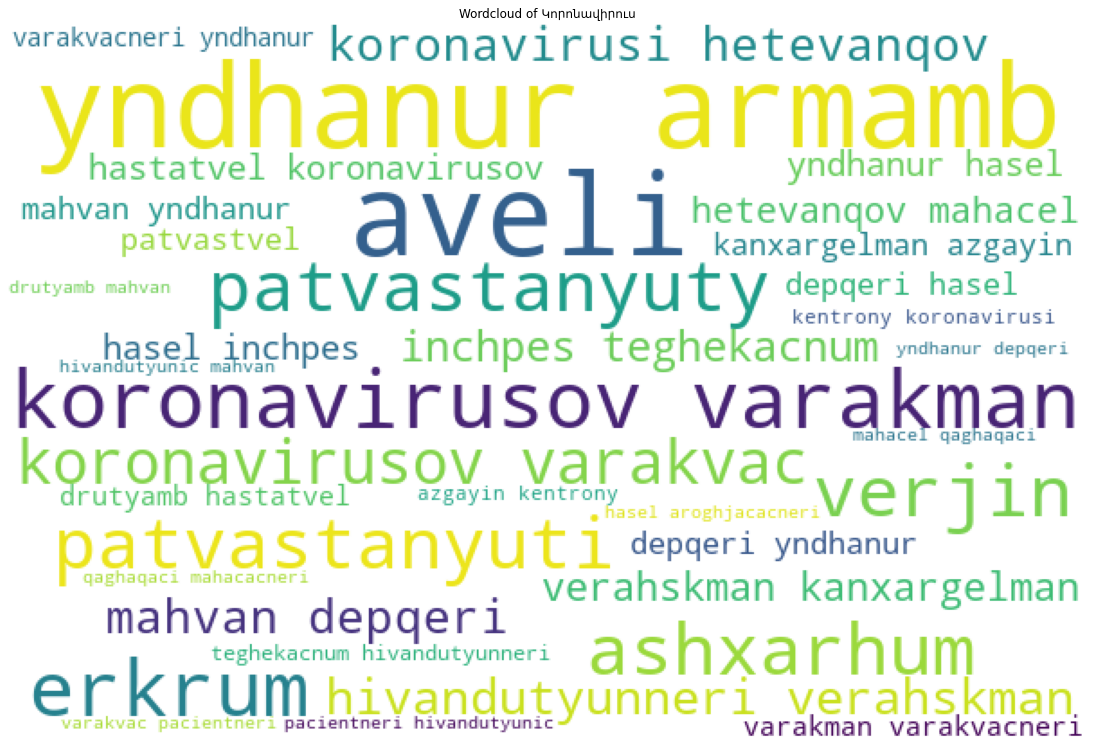

In [ ]:
for i in all_data_clean['Category'].unique():
  create_word_cloud(all_data_clean,i)

### **Separate data categories**

In [14]:
all_data_clean.loc[(all_data_clean['Category']=='Իրադարձային') | (all_data_clean['Category']=='Քաղաքականություն'),'Category']='Քաղաքական'
all_data_clean.loc[(all_data_clean['Category']!='Քաղաքական') & (all_data_clean['Category']!='Սպորտ') & (all_data_clean['Category']!='Մշակույթ'),'Category']='Այլ'

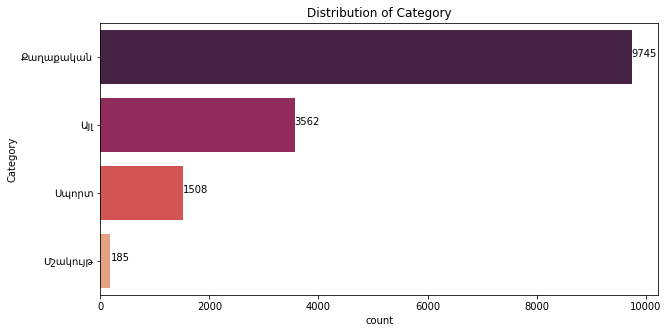

In [16]:
# fig=go.Figure()
# fig.add_trace(go.Bar(y=all_data_clean.Category.value_counts().sort_values(ascending=True).index,
#                     x=all_data_clean.Category.value_counts().sort_values(ascending=True),
#                     name='',
#                     orientation='h',
#                     showlegend=False,
#                     text=all_data_clean.Category.value_counts().sort_values(ascending=True),
#                     textposition='outside'))
# fig.update_layout(title="Distribution of categories",
#                   width=1000, height=500,
#                   # paper_bgcolor="LightSteelBlue"
#                   )
# fig.show()
# fig.write_image("01.png")
# fig.show(renderer="jpg", width=1000, height=600,engine="kaleido")
# fig.write_image("figure.png", engine="kaleido")
def bar_plot(data,
             column,
             palette="rocket",
             figsize=(10,5),ax=None):
  plt.figure(figsize=figsize) #size of figure
  ax = sns.countplot(ax=ax,y=column,palette=palette,data=data,order = data[column].value_counts().index) #countplot from seaborn
  for index, value in enumerate(data[column].value_counts(ascending=False)): #show values in figure
      ax.text(value, index, str(value))
  ax.set_title('Distribution of '+column)
bar_plot(all_data_clean,'Category')

## **Text Classification model**

### **Train test split and countvectorization**

In [17]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

y=all_data_clean['Category']
X=all_data_clean['Article']

arm_stop_words=["այդ","այլ","այն","այս","դու","դուք","եմ",
            "են","ենք","ես","եք","է","էի","էին","էինք",
            "էիր","էիք","էր","ըստ","թ.","ի","ին","իսկ",
            "իր","կամ","համար","հետ","հետո","մենք","մեջ","մասին",
            "մի","նա","նաև","նրա","նրանք","որ","որը",
            "որոնք","որպես","ում","պիտի","վրա","և","եւ","կարող","սակայն",
            "ահա", "անգամ", "գեթ", "գոնե", "իբր", "իսկ", "թող", "լոկ",
            "խո", "խոմ", "հենց", "հո", "մանավանդ","իրոք որ", "թերևս", "թեկուզ",
            "կարծես", "միգուցե", "միթե", "մինչև","անգամ", "նույնիսկ",
            "անկասկած", "անպատճառ", "անտարակույս", "բարեբախտաբար", 
            "դժբախտաբար", "տարաբախտաբար", "իսկապես", "միայն"]


X_train,X_test,y_train,y_test=train_test_split(
    X,y,test_size=0.33,random_state=53)

count_vectorizer=CountVectorizer(stop_words=arm_stop_words)
count_train=count_vectorizer.fit_transform(X_train.values)
count_test=count_vectorizer.transform(X_test.values)

print(count_vectorizer.get_feature_names()[:10])

['aaron', 'aastmt', 'abandoned', 'abc', 'abcին', 'abcն', 'abdul', 'abibo', 'abm', 'absoluta']


### **TfidfVectorizer**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words=arm_stop_words, max_df=0.7)

tfidf_train = tfidf_vectorizer.fit_transform(X_train.values)

tfidf_test = tfidf_vectorizer.transform(X_test.values)

print(tfidf_train.A)
tfidf_train.shape


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


(10050, 94928)

### **DataFrame from `CountVectorizer`

In [18]:
# Create the CountVectorizer DataFrame: count_df
count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())
# Create the TfidfVectorizer DataFrame: tfidf_df
# tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())

# Print the head of each DataFrame to investigate their structure. 
print(count_df.head())

# Print the head of tfidf_df
# print(tfidf_df.head())


   aaron  aastmt  abandoned  abc  abcին  ...  של  שניהם  תקף  תקפו  ﬔխանիզﬕ
0      0       0          0    0      0  ...   0      0    0     0        0
1      0       0          0    0      0  ...   0      0    0     0        0
2      0       0          0    0      0  ...   0      0    0     0        0
3      0       0          0    0      0  ...   0      0    0     0        0
4      0       0          0    0      0  ...   0      0    0     0        0

[5 rows x 94928 columns]


### **ML models for classification**

In [19]:
import random
color_list_plotly=['aggrnyl', 'agsunset', 'algae', 'amp', 'armyrose', 'balance',
             'blackbody', 'bluered', 'blues', 'blugrn', 'bluyl', 'brbg',
             'brwnyl', 'bugn', 'bupu', 'burg', 'burgyl', 'cividis', 'curl',
             'darkmint', 'deep', 'delta', 'dense', 'earth', 'edge', 'electric',
             'emrld', 'fall', 'geyser', 'gnbu', 'gray', 'greens', 'greys',
             'haline', 'hot', 'hsv', 'ice', 'icefire', 'inferno', 'jet',
             'magenta', 'magma', 'matter', 'mint', 'mrybm', 'mygbm', 'oranges',
             'orrd', 'oryel', 'peach', 'phase', 'picnic', 'pinkyl', 'piyg',
             'plasma', 'plotly3', 'portland', 'prgn', 'pubu', 'pubugn', 'puor',
             'purd', 'purp', 'purples', 'purpor', 'rainbow', 'rdbu', 'rdgy',
             'rdpu', 'rdylbu', 'rdylgn', 'redor', 'reds', 'solar', 'spectral',
             'speed', 'sunset', 'sunsetdark', 'teal', 'tealgrn', 'tealrose',
             'tempo', 'temps', 'thermal', 'tropic', 'turbid', 'twilight',
             'viridis', 'ylgn', 'ylgnbu', 'ylorbr', 'ylorrd']

### **Naive Bayes with scikit-learn**

Accuracy:  0.8759595959595959
              precision    recall  f1-score   support

         Այլ       0.76      0.73      0.74      1171
    Մշակույթ       0.75      0.61      0.67        62
       Սպորտ       0.99      0.98      0.98       525
   Քաղաքական       0.90      0.92      0.91      3192

    accuracy                           0.88      4950
   macro avg       0.85      0.81      0.83      4950
weighted avg       0.87      0.88      0.87      4950



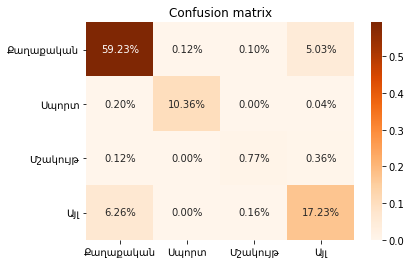

In [25]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
nb_classifier=MultinomialNB(0.23)

nb_classifier.fit(count_train,y_train)
pred=nb_classifier.predict(count_test)
print('Accuracy: ',metrics.accuracy_score(y_test,pred))
# import plotly.figure_factory as ff
# fig = ff.create_annotated_heatmap(metrics.confusion_matrix(y_test,pred,labels=['Քաղաքական','Սպորտ','Մշակույթ','Այլ']),
#                                   x=['Քաղաքական','Սպորտ','Մշակույթ','Այլ'],y=['Քաղաքական','Սպորտ','Մշակույթ','Այլ'],
#                                   colorscale=random.choice(color_list_plotly))
# fig.update_layout(title='Accuracy matrix',
#                   width=500, height=500,
#                   # paper_bgcolor="LightSteelBlue"
#                   )
# fig.show()
cf_matrix = metrics.confusion_matrix(y_test, pred,labels=['Քաղաքական','Սպորտ','Մշակույթ','Այլ'])
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, xticklabels=['Քաղաքական','Սպորտ','Մշակույթ','Այլ'],
            yticklabels=['Քաղաքական','Սպորտ','Մշակույթ','Այլ'],fmt='.2%', cmap='Oranges')
plt.title('Confusion matrix')
print(metrics.classification_report(y_test,pred, target_names=['Քաղաքական','Սպորտ','Մշակույթ','Այլ'][::-1]))

### **Optimum alpha**

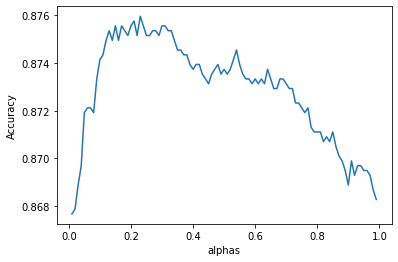

In [26]:
alphas = np.arange(0.01,1,0.01)

# Define train_and_predict()
def train_and_predict(alpha):
    nb_classifier = MultinomialNB(alpha=alpha)
    nb_classifier.fit(count_train,y_train)
    pred=nb_classifier.predict(count_test)
    score = metrics.accuracy_score(y_test,pred)
    return score


scores=[]
# Iterate over the alphas and print the corresponding score
for alpha in alphas:
    scores.append(train_and_predict(alpha))
# fig = px.line(x=alphas, y=scores,
#               )
# fig.update_layout(title='Accuracy with different alphas',
#                   width=500, height=500,
#                   xaxis_title="Alpha",
#                   yaxis_title="Accuracy",
#                   paper_bgcolor="LightSteelBlue"
#                   )
# fig.show()
plt.plot(alphas,scores)
plt.xlabel('alphas')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
# nb_classifier=MultinomialNB(0.01)
# nb_classifier.fit(tfidf_train,y_train)
# pred=nb_classifier.predict(tfidf_test)
# print('Accuracy: ',metrics.accuracy_score(y_test,pred))
# print('Accuracy matrix\n\n',
#       metrics.confusion_matrix(y_test,pred,
#                                labels=['Այլ', 'Ժամանց', 'Սպորտ', 'Քաղաքական']
#                                )
#       )

Accuracy:  0.7854984894259819
Accuracy matrix

 [[ 34   0   1  61]
 [  1   0   0   2]
 [  0   0  18   2]
 [  4   0   0 208]]


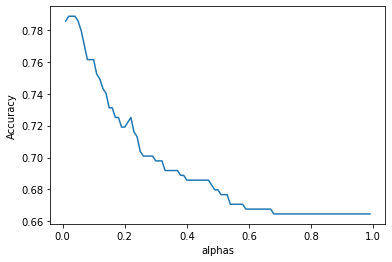

In [ ]:
# import numpy as np
# alphas = np.arange(0.01,1,0.01)

# def train_and_predict(alpha):
#     nb_classifier = MultinomialNB(alpha=alpha)
#     nb_classifier.fit(tfidf_train,y_train)
#     pred=nb_classifier.predict(tfidf_test)
#     score = metrics.accuracy_score(y_test,pred)
#     return score

# for alpha in alphas:
#     scores.append(train_and_predict(alpha))
# import matplotlib.pyplot as plt

# plt.plot(alphas,scores)
# plt.xlabel('alphas')
# plt.ylabel('Accuracy')
# plt.show()

### **Logistic Regression**

Accuracy Logistic:  0.8903030303030303
              precision    recall  f1-score   support

         Այլ       0.82      0.73      0.77      1171
    Մշակույթ       0.80      0.39      0.52        62
       Սպորտ       1.00      0.95      0.97       525
   Քաղաքական       0.90      0.95      0.92      3192

    accuracy                           0.89      4950
   macro avg       0.88      0.75      0.80      4950
weighted avg       0.89      0.89      0.89      4950



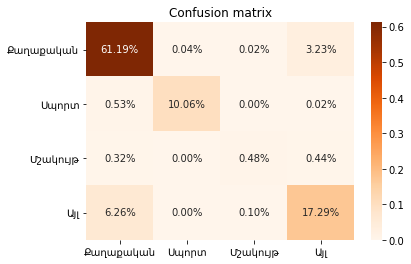

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score
clsf=LogisticRegression(C=0.55)
clsf.fit(count_train,y_train)
pred=clsf.predict(count_test)
print('Accuracy Logistic: ',accuracy_score(y_test,pred))
# fig = ff.create_annotated_heatmap(metrics.confusion_matrix(y_test,pred,labels=['Քաղաքական','Սպորտ','Մշակույթ','Այլ']),
#                                   x=['Քաղաքական','Սպորտ','Մշակույթ','Այլ'],y=['Քաղաքական','Սպորտ','Մշակույթ','Այլ'],
#                                   colorscale=random.choice(color_list_plotly))
# fig.update_layout(title='Accuracy matrix',
#                   width=500, height=500,
#                   # paper_bgcolor="LightSteelBlue"
#                   )
# fig.show()
cf_matrix = metrics.confusion_matrix(y_test, pred,labels=['Քաղաքական','Սպորտ','Մշակույթ','Այլ'])
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, xticklabels=['Քաղաքական','Սպորտ','Մշակույթ','Այլ'],
            yticklabels=['Քաղաքական','Սպորտ','Մշակույթ','Այլ'],fmt='.2%', cmap='Oranges')
plt.title('Confusion matrix')
print(metrics.classification_report(y_test,pred, target_names=['Քաղաքական','Սպորտ','Մշակույթ','Այլ'][::-1]))

### **Decision Tree Classifier**

Accuracy Decision Tree:  0.8468686868686869
              precision    recall  f1-score   support

         Այլ       0.74      0.65      0.69      1171
    Մշակույթ       0.36      0.15      0.21        62
       Սպորտ       0.99      0.92      0.95       525
   Քաղաքական       0.86      0.92      0.89      3192

    accuracy                           0.85      4950
   macro avg       0.74      0.66      0.69      4950
weighted avg       0.84      0.85      0.84      4950



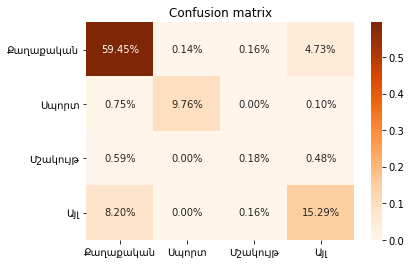

In [28]:
from sklearn.tree import DecisionTreeClassifier
clsf=DecisionTreeClassifier(max_depth=50)
clsf.fit(count_train,y_train)
pred=clsf.predict(count_test)
print('Accuracy Decision Tree: ',accuracy_score(y_test,pred))
# fig = ff.create_annotated_heatmap(metrics.confusion_matrix(y_test,pred,labels=['Քաղաքական','Սպորտ','Մշակույթ','Այլ']),
#                                   x=['Քաղաքական','Սպորտ','Մշակույթ','Այլ'],y=['Քաղաքական','Սպորտ','Մշակույթ','Այլ'],
#                                   colorscale=random.choice(color_list_plotly))
# fig.update_layout(title='Accuracy matrix',
#                   width=500, height=500,
#                   # paper_bgcolor="LightSteelBlue"
#                   )
# fig.show()
cf_matrix = metrics.confusion_matrix(y_test, pred,labels=['Քաղաքական','Սպորտ','Մշակույթ','Այլ'])
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, xticklabels=['Քաղաքական','Սպորտ','Մշակույթ','Այլ'],
            yticklabels=['Քաղաքական','Սպորտ','Մշակույթ','Այլ'],fmt='.2%', cmap='Oranges')
plt.title('Confusion matrix')
print(metrics.classification_report(y_test,pred, target_names=['Քաղաքական','Սպորտ','Մշակույթ','Այլ'][::-1]))

### **Random Forest Classifier**

Accuracy Random Forest:  0.8462626262626263
              precision    recall  f1-score   support

   Քաղաքական       0.98      0.44      0.61      1171
       Սպորտ       0.00      0.00      0.00        62
    Մշակույթ       1.00      0.93      0.96       525
         Այլ       0.81      1.00      0.89      3192

    accuracy                           0.85      4950
   macro avg       0.70      0.59      0.62      4950
weighted avg       0.86      0.85      0.82      4950



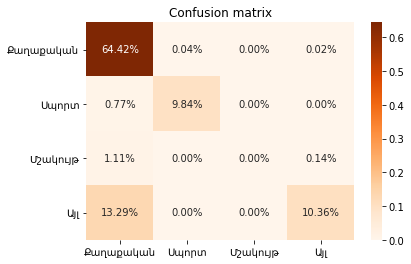

In [29]:
from sklearn.ensemble import RandomForestClassifier
clsf=RandomForestClassifier(n_estimators=200,max_depth=50)
clsf.fit(count_train,y_train)
pred=clsf.predict(count_test)
print('Accuracy Random Forest: ',accuracy_score(y_test,pred))
# fig = ff.create_annotated_heatmap(metrics.confusion_matrix(y_test,pred,labels=['Քաղաքական','Սպորտ','Մշակույթ','Այլ']),
#                                   x=['Քաղաքական','Սպորտ','Մշակույթ','Այլ'],y=['Քաղաքական','Սպորտ','Մշակույթ','Այլ'],
#                                   colorscale=random.choice(color_list_plotly))
# fig.update_layout(title='Accuracy matrix',
#                   width=500, height=500,
#                   # paper_bgcolor="LightSteelBlue"
#                   )
# fig.show()
cf_matrix = metrics.confusion_matrix(y_test, pred,labels=['Քաղաքական','Սպորտ','Մշակույթ','Այլ'])
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, xticklabels=['Քաղաքական','Սպորտ','Մշակույթ','Այլ'],
            yticklabels=['Քաղաքական','Սպորտ','Մշակույթ','Այլ'],fmt='.2%', cmap='Oranges')
plt.title('Confusion matrix')
print(metrics.classification_report(y_test,pred, target_names=['Քաղաքական','Սպորտ','Մշակույթ','Այլ']))


## Best Regards

<h4 align="left">Artur Avagyan</h4>
    <ul>
    <li>Actuarial supervisor at Central Bank of Armenia</li>
    <li>Student from YSU (Data Science for Business Master's Degree Program)</li>
    <li>E-mail:   avagyan.artur97@gmail.com</li>
    <li>LinkedIn: <a href="https://www.linkedin.com/in/artur-avagyan-0a16311b3">Artur Avagyan</a></li>
    <li>GitHub:   <a href="https://github.com/artur-avagyan">Artur Avagyan</a></li>
    <li>Phone:    +37498641815</li>
    </ul>

<h3 align="center">YSU DSB 2020-2021</h3>